<a href="https://colab.research.google.com/github/varunkr24/Capstone-Project/blob/Python/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [2]:
# import needed libraries
import os as os
import time
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# Mount the Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/

/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1


In [ ]:
cd /content/drive/MyDrive/AIML/Projects/CNN/Cars/

/content/drive/MyDrive/AIML/Projects/CNN/Cars


In [ ]:
os.chdir('./Images')  

In [5]:
pathToCarImages = '/content/drive/MyDrive/AIML/CarImages/CarImages/TrainImages/'
listing = os.listdir( pathToCarImages)

In [4]:
listing

['Acura TSX Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TL Sedan 2012',
 'Acura RL Sedan 2012',
 'Acura Integra Type R 2001',
 'Acura ZDX Hatchback 2012',
 'Audi A5 Coupe 2012',
 'AM General Hummer SUV 2000',
 'Audi 100 Wagon 1994',
 'Aston Martin Virage Coupe 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi 100 Sedan 1994',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S5 Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi V8 Sedan 1994',
 'Audi S4 Sedan 2012',
 'Audi TT RS Coupe 2012',
 'Audi S4 Sedan 2007',
 'Audi S5 Convertible 2012',
 'Bentley Arnage Sedan 2009',
 'Bentley Continental GT Coupe 2007',
 'Bentley Mulsanne Sedan 2011',
 'BMW 1 Series Convertible 2012',
 'BMW 3 Series Sedan 2012',
 'Bentley Continental Supersports Conv. Convertible 2012',
 'Bentley Continental Flying Spur Sedan 2007',
 'BMW 1 Series Coupe 2012',
 'Bentley 

# Loading the dataset

In [6]:
import cv2

In [57]:
cd /content/drive/MyDrive/AIML/CarImages/CarImages/

/content/drive/MyDrive/AIML/CarImages/CarImages


In [59]:
os.chdir('./TrainImages/')

In [11]:
pathToCarImages = '/content/drive/MyDrive/AIML/CarImages/CarImages/TrainImages/'
listing = os.listdir( pathToCarImages)
num_folders = len(listing)
print ( num_folders)
CarImagesArray = [[]]
CarImagesPaths = []
CarImagesCategories = []
CarImages = []
t0=time.time()

for imgFolder in listing:
  #print(imgFolder)
  path = pathToCarImages + imgFolder
  files = os.listdir(path)
  for imgFile in files:
    imgPath = path + '/' + imgFile  
    CarImages.append(cv2.imread(imgPath)) # images
    CarImagesArray.append([imgPath, imgFolder]) # image path, image folder
    CarImagesPaths.append(imgPath) # paths to images
    CarImagesCategories.append(imgFolder) # labels

196


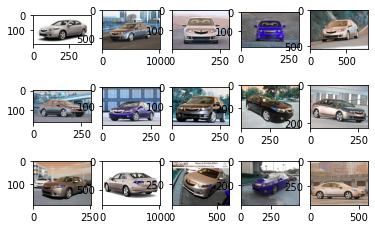

In [12]:
for i in range(15):
  plt.subplot(3,5, i+1)
  plt.imshow(CarImages[i])

**Note**    
Images names have been used as labels. One should use One hot encoder or label encoder as per model requirement

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(CarImagesCategories)
x = le.transform(CarImagesCategories)

# Dispaly images

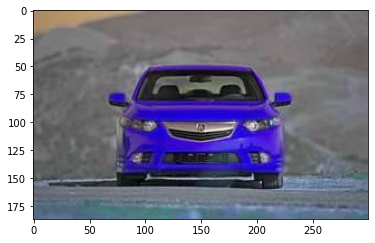

In [14]:
plt.imshow(CarImages[3])

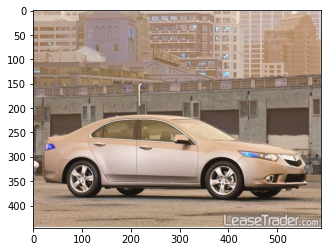

In [15]:
plt.imshow(CarImages[14])

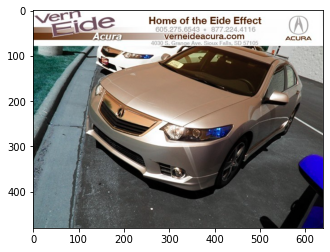

In [16]:
plt.imshow(CarImages[12])

# Display Image with Label

Label:
Acura TSX Sedan 2012


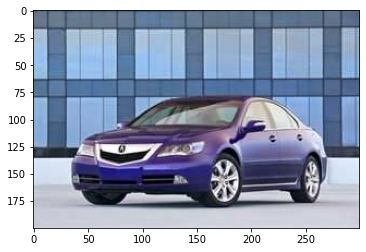

In [17]:
print('Label:')
print(CarImagesCategories[6])
plt.imshow(CarImages[6])

# Apply filters on images

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


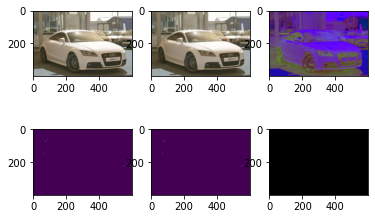

In [ ]:
clearTrainImg = []
examples = []; getEx = True
for img in CarImages:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTrainImg.append(clear)  # Append image without background
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

**Blur effect on Image**

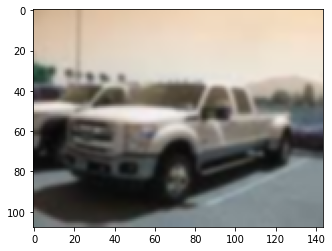

In [ ]:
plt.imshow(blurImg)

# Thanks